# Shopee Data Analysis
This notebook analyzes Shopee's product data.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "20240121_shopee_sample_data_.csv"
df = pd.read_csv(file_path)

# Convert w_date to datetime format
df["w_date"] = pd.to_datetime(df["w_date"], errors="coerce")

# Display basic information
df.head()
    

price_ori               delivery  \
0      25.80  KL City, Kuala Lumpur   
1       1.41                    NaN   
2       8.50  KL City, Kuala Lumpur   
3       8.70                    NaN   
4    3999.00  KL City, Kuala Lumpur   

                                item_category_detail  \
0  Shopee | Women's Bags | Shoulder Bags | Should...   
1  Shopee | Home Appliances | Sewing Machines | S...   
2    Shopee | Women's Bags | Handbags | Set Handbags   
3  Shopee | Women Clothes | Maternity Wear | Inne...   
4   Shopee | Cameras & Drones | DSLR Cameras | DSLRs   

                                       specification  \
0  Product Specifications Category Shopee Women's...   
1  Product Specifications Category Shopee Home Ap...   
2  Product Specifications Category Shopee Women's...   
3  Product Specifications Category Shopee Women C...   
4  Product Specifications Category Shopee Cameras...   

                                               title     w_date  \
0  1081 PU SLING BAG KULIT leather Casual Beg Tan... 2023-04-27   
1  Stat Chinese Traditional Frog Buttons Knot Che... 2023-04-27   
2  N09 READY STOCK MYFOOYIN woman handbag set 2in... 2023-04-26   
3  🔥Shocking Sale🔥Cotton Comfort Nursing Bra Brea... 2023-04-26   
4  Canon EOS 70D 18-55mm IS STM Original+64gb+ext... 2023-04-26   

                                            link_ori item_rating  \
0  https://shopee.com.my/1081-PU-SLING-BAG-KULIT-...         4.9   
1  https://shopee.com.my/Stat-Chinese-Traditional...         5.0   
2  https://shopee.com.my/N09-READY-STOCK-MYFOOYIN...         4.9   
3  https://shopee.com.my/%F0%9F%94%A5Shocking-Sal...         4.9   
4  https://shopee.com.my/Canon-EOS-70D-18-55mm-IS...         5.0   

     seller_name                         idElastic  price_actual sitename  \
0   qqfwholesale  19ec9fdedd9fe3e14bc652950fc3c423         12.90   shopee   
1  stationery.my  5322309be3b6d9c01d15fa19f5b7ad9a          0.75   shopee   
2       fooyin88  7a36765d1e2ca2b6a5414ddfeedfefc3          8.50   shopee   
3       vivi2002  7fc4ab69722e4f788f217b4c044f83eb          8.70   shopee   
4    xpro.gadget  55608f901f4c5384f884de18227d4298       2739.00   shopee   

                             idHash total_rating  \
0  88f051f0a2dcf0d29191e0175b828938          179   
1  472d22f58af3bb35cf28c6eed7088dc5           17   
2  ec6ce64f4b77efb38b6392818959f181         8.1k   
3  ef4e0e17fdc7d0125d8609dcc395bc3d         6.5k   
4  568c2029fed7d22973ff96d0404a8ff8           10   

                                 id total_sold  \
0  88f051f0a2dcf0d29191e0175b828938        179   
1  472d22f58af3bb35cf28c6eed7088dc5         17   
2  ec6ce64f4b77efb38b6392818959f181       8.1k   
3  ef4e0e17fdc7d0125d8609dcc395bc3d       6.5k   
4  568c2029fed7d22973ff96d0404a8ff8         10   

                                           pict_link         favorite  \
0  https://down-my.img.susercontent.com/file/my-1...    Favorite (128   
1  https://down-my.img.susercontent.com/file/4147...     Favorite (19   
2  https://down-my.img.susercontent.com/file/23da...  Favorite (21.5k   
3  https://down-my.img.susercontent.com/file/df47...   Favorite (3.4k   
4  https://down-my.img.susercontent.com/file/4d3a...    Favorite (132   

       timestamp                                               desc  
0  1682553600000  🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...  
1  1682553600000  Chinese Traditional Frog Buttons Knot Cheongsa...  
2  1682467200000  READY STOCK\nMEASUREMENT:\nLONG 26CM X HEIGHT ...  
3  1682467200000  PRODUCT DESCRIPTION\nMaterial:95%Cotton+5%Span...  
4  1682467200000  Canon 70D\nHighlights\nEF-S 18-55mm f/3.5-5.6 ...

## Products Crawled Per Date

C:\Users\User\AppData\Local\Temp\ipykernel_15648\353407843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products_per_date.index.astype(str), y=products_per_date.values, palette="viridis")


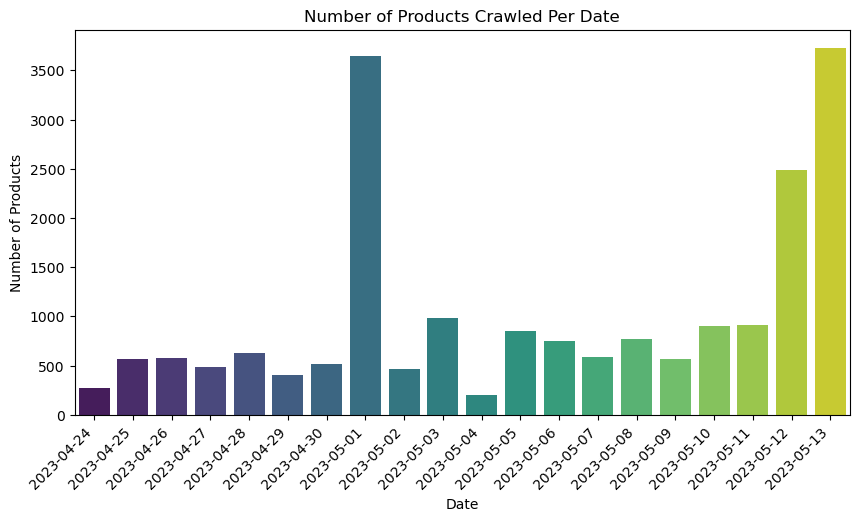

w_date
2023-04-24     276
2023-04-25     570
2023-04-26     581
2023-04-27     486
2023-04-28     629
2023-04-29     405
2023-04-30     511
2023-05-01    3646
2023-05-02     466
2023-05-03     985
2023-05-04     201
2023-05-05     852
2023-05-06     747
2023-05-07     583
2023-05-08     774
2023-05-09     571
2023-05-10     904
2023-05-11     915
2023-05-12    2483
2023-05-13    3727
Name: count, dtype: int64

In [2]:

# Count products per date
products_per_date = df["w_date"].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=products_per_date.index.astype(str), y=products_per_date.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Date")
plt.ylabel("Number of Products")
plt.title("Number of Products Crawled Per Date")
plt.show()

products_per_date
    

## Products Count Based on Location

In [3]:

# Extract location from "specification"
df["location"] = df["specification"].str.extract(r"Ships From ([\w\s]+)", expand=False)

# Count occurrences
location_counts = df["location"].value_counts()

# Plot location distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location")
plt.ylabel("Number of Products")
plt.title("Number of Products Based on Location")
plt.show()

location_counts
    

C:\Users\User\AppData\Local\Temp\ipykernel_15648\575050034.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")


location
Selangor               6287
Mainland China         2655
Kuala Lumpur           2590
Johor                  1377
Perak                  1322
                       ... 
Ranau                     1
KOTA JAKARTA BARAT        1
Balik Pulau               1
Kampar                    1
Kudat                     1
Name: count, Length: 115, dtype: int64

## Product Categories Analysis

<>:2: SyntaxWarning: invalid escape sequence '\|'
<>:2: SyntaxWarning: invalid escape sequence '\|'
C:\Users\User\AppData\Local\Temp\ipykernel_15648\2406349706.py:2: SyntaxWarning: invalid escape sequence '\|'
  df[["Main_Category", "Subcategory_1", "Subcategory_2"]] = df["item_category_detail"].str.split(" \| ", n=2, expand=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15648\2406349706.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_category_counts.index, y=main_category_counts.values, palette="magma")


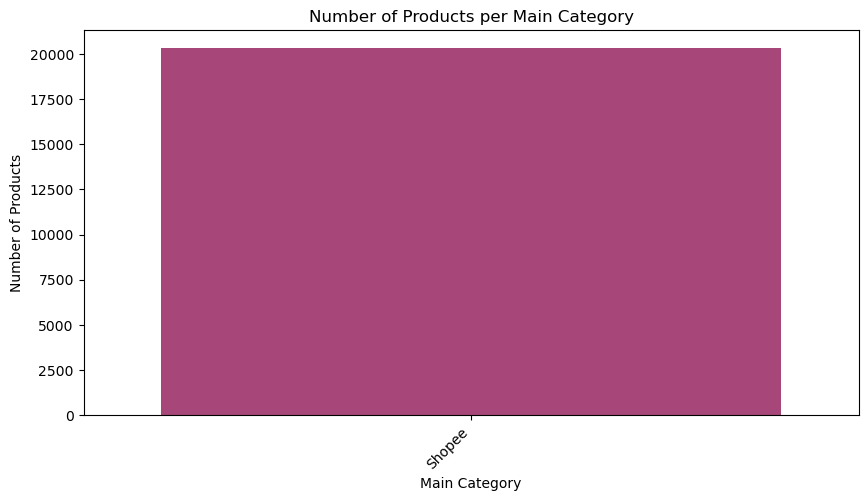

Main_Category
Shopee    20312
Name: count, dtype: int64

In [4]:

# Extract categories
df[["Main_Category", "Subcategory_1", "Subcategory_2"]] = df["item_category_detail"].str.split(" \| ", n=2, expand=True)

# Count products per main category
main_category_counts = df["Main_Category"].value_counts()

# Plot main category distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=main_category_counts.index, y=main_category_counts.values, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Main Category")
plt.ylabel("Number of Products")
plt.title("Number of Products per Main Category")
plt.show()

main_category_counts
    

## Top Subcategories for Top 3 Main Categories

In [5]:

# Get top 3 main categories and their top 5 subcategories
top_3_main_categories = main_category_counts.head(3).index.tolist()
top_subcategories = {}

for category in top_3_main_categories:
    subcat_counts = df[df["Main_Category"] == category]["Subcategory_1"].value_counts().head(5)
    top_subcategories[category] = subcat_counts

top_subcategories
    

{'Shopee': Subcategory_1
 Health & Beauty         2464
 Men Clothes             2458
 Women Clothes           2232
 Mobile & Accessories    1887
 Baby & Toys             1496
 Name: count, dtype: int64}

## Price Range for Each Main Category

In [6]:

# Compute min and max price_actual per main category
price_range = df.groupby("Main_Category")["price_actual"].agg(["min", "max"])
price_range
    

min          max
Main_Category                  
Shopee         0.0  999999999.0

## Revenue per Main Category

C:\Users\User\AppData\Local\Temp\ipykernel_15648\1362859880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_category.index, y=revenue_per_category.values, palette="cividis")


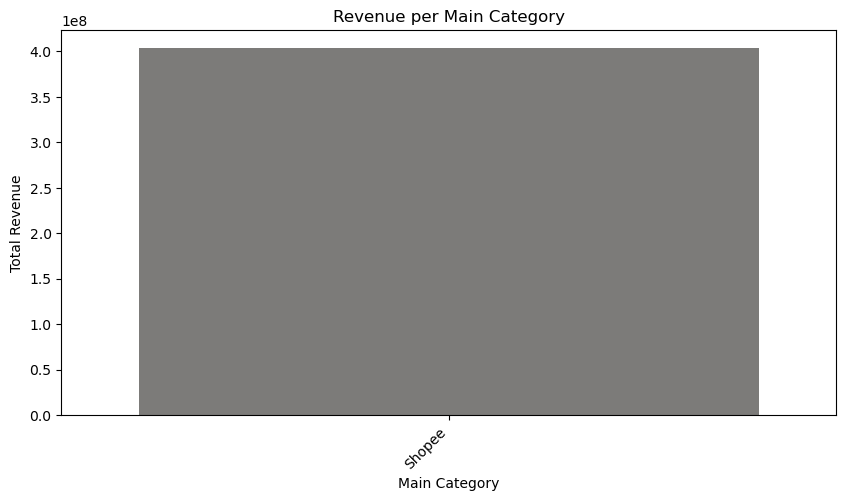

Main_Category
Shopee    4.032840e+08
Name: revenue, dtype: float64

In [7]:

# Compute revenue per main category
df["total_sold"] = pd.to_numeric(df["total_sold"], errors="coerce")  # Convert to numeric
df["revenue"] = df["price_actual"] * df["total_sold"]  # Calculate revenue
revenue_per_category = df.groupby("Main_Category")["revenue"].sum().sort_values(ascending=False)

# Plot revenue
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_per_category.index, y=revenue_per_category.values, palette="cividis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Main Category")
plt.ylabel("Total Revenue")
plt.title("Revenue per Main Category")
plt.show()

revenue_per_category
    